In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
import numpy as np

<h1> Notes deciosion tree ! </h1>

In [2]:
df = pd.read_csv("../../../resources/data/500_Person_Gender_Height_Weight_Index.csv")  
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
df['obese'] = (df.Index > 4).astype('int')
df.drop('Index',axis=1,inplace = True)

In [4]:
X = df.drop('Gender',axis=1)
X

,Height,Weight,obese
0,174,96,0
1,189,87,0
2,185,110,0
3,195,104,0
4,149,61,0
...,...,...,...
495,150,153,1
496,184,121,0
497,141,136,1
498,150,95,1


In [5]:
is_ob = df[df['obese']==0].drop('obese',axis=1)
ob = df[df['obese']==1].drop('obese',axis=1)

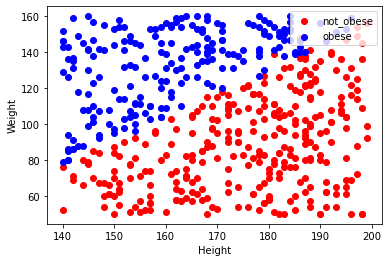

In [6]:
plt.scatter(is_ob['Height'],is_ob['Weight'],color='r',label='not_obese')
plt.scatter(ob['Height'],ob['Weight'],color='b',label='obese')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

Entropy

$$H(x) = - \sum_{k=0}^m p_k\log_2{p_k} $$
$k = 0,...,m$ target variable

In [7]:
df

,Gender,Height,Weight,obese
0,Male,174,96,0
1,Male,189,87,0
2,Female,185,110,0
3,Female,195,104,0
4,Male,149,61,0
...,...,...,...,...
495,Female,150,153,1
496,Female,184,121,0
497,Female,141,136,1
498,Male,150,95,1


In [10]:
def entropy(X,y):
    """
    
    """
    counter =  collections.Counter(y)
    p = np.array(list(counter.values()))/len(y)
    return -np.sum(p*np.log2(p))

In [34]:
weights = df['Weight'].unique()
data = np.array([0,0])
for i in range(1,len(weights)):
    weight = weights[i]
    a = df[df['Weight']<weight]
    e = entropy(a.drop('obese',axis=1),a['obese'])
    data = np.vstack([data,[weight,e]])

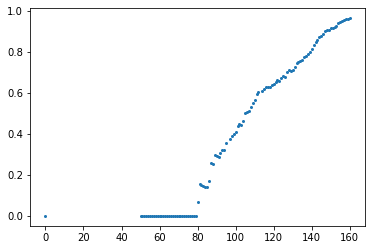

In [47]:
plt.scatter(data[:,0],data[:,1],s=4)